# Decision Trees
* Simple Tree like structure, model makes a decision at every node
* Useful in simple tasks
* One of the most popular algorithm
* Easy explainability, easy to show how a decision process works!

# Why decision trees are popular?
* Easy to interpret and present
* Well defined Logic, mimic human level thought
* Random Forests, Ensembles of decision trees are more powerful classifiers
* Feature values are preferred to be categorical. If the values are continuous then they are discretized prior to building the model.

# Build Decision Trees
Two common algorithms -

* CART (Classification and Regression Trees) → uses Gini Index(Classification) as metric.
* ID3 (Iterative Dichotomiser 3) → uses Entropy function and Information gain as metrics

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
columns_to_drop = ["PassengerId","Name","Ticket","Cabin","Embarked"]

In [5]:
data_clean  = data.drop(columns=columns_to_drop)
data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [6]:
le = LabelEncoder()
data_clean["Sex"] = le.fit_transform(data_clean["Sex"])
data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [7]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [8]:
data_clean = data_clean.fillna(data_clean["Age"].mean())
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [9]:
input_cols = ["Pclass","Sex","Age","SibSp","Parch","Fare"]
out_cols = ["Survived"]

X = data_clean[input_cols]
y = data_clean[out_cols]

In [10]:
def entropy(col):
    counts = np.unique(col,return_counts=True)
    N = float(col.shape[0])
    ent = 0.0
    for ix in counts[1]:
        p = ix/N
        ent +=(-1.0 * p * np.log2(p))
    return ent
def divide_data(X,fkey,fval):
    X_right = pd.DataFrame([],columns=X.columns)
    X_left = pd.DataFrame([],columns=X.columns)
    
    for ix in range(X.shape[0]):
        val = X[fkey].loc[ix]
        if val>fval:
            X_right = X_right.append(X.loc[ix])
        else:
            X_left = X_left.append(X.loc[ix])
    return X_left,X_right
def information_gain(X,fkey,fval):
    
    left,right = divide_data(X,fkey,fval)
    
    l = float(left.shape[0])/X.shape[0]
    r = float(right.shape[0])/X.shape[0] 
    
    if left.shape[0]==0 or right.shape[0]==0:
        return -1000000
    
        
    inf_gain = entropy(X.Survived) - (l * entropy(left.Survived) + r * entropy(right.Survived))
    return inf_gain

In [11]:
for fx in X.columns:
    print(fx,end=" ---> ")
    print(information_gain(data_clean,fx,data_clean[fx].mean()))

Pclass ---> 0.07579362743608165
Sex ---> 0.2176601066606142
Age ---> 0.001158644038169343
SibSp ---> 0.009584541813400071
Parch ---> 0.015380754493137694
Fare ---> 0.042140692838995464


In [12]:
class DecisionTree:
    def __init__(self,depth=0,max_depth=5):
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None
        self.max_depth = max_depth
        self.depth = depth
        self.target = None
    def train(self,X_train):
        features = ["Pclass","Sex","Age","SibSp","Parch","Fare"]
        info_gain = []
        for ix in features:
            ingain = information_gain(X_train,ix,X_train[ix].mean())
            info_gain.append(ingain)
            
        self.fkey = features[np.argmax(info_gain)]
        self.fval = X_train[self.fkey].mean()
        
        print("Making Tree Features is ",self.fkey)
        
        X_left,X_right = divide_data(X_train,self.fkey,self.fval)
        X_left = X_left.reset_index(drop = True)
        X_right =X_right.reset_index(drop = True)
        
        if X_left.shape[0]==0 or X_right.shape[0]==0:
            if X_train.Survived.mean() >= 0.5:
                self.target = "Survive"
            else:
                self.target = "Dead"
            return
        if self.depth>=self.max_depth:
            if X_train.Survived.mean() >= 0.5:
                self.target = "Survive"
            else:
                self.target = "Dead"
            return
        self.left = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.left.train(X_left)
        
        self.right =DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.right.train(X_right)
        
        if X_train.Survived.mean() >= 0.5:
            self.target = "Survive"
        else:
            self.target = "Dead"
        return
    
    def predict(self,test):
        if test[self.fkey]>self.fval:
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            if self.left is None:
                return self.target
            return self.left.predict(test)

In [13]:
split = int(0.7*data_clean.shape[0])
train_data = data_clean[:split]
test_data = data_clean[split:]
test_data = test_data.reset_index(drop=True)

In [14]:
d =  DecisionTree()
d.train(train_data)

Making Tree Features is  Sex
Making Tree Features is  Pclass
Making Tree Features is  Age
Making Tree Features is  SibSp
Making Tree Features is  Pclass
Making Tree Features is  Age
Making Tree Features is  Age
Making Tree Features is  SibSp
Making Tree Features is  Parch
Making Tree Features is  Pclass
Making Tree Features is  SibSp
Making Tree Features is  Fare
Making Tree Features is  Parch
Making Tree Features is  Age
Making Tree Features is  Pclass
Making Tree Features is  Age
Making Tree Features is  Age
Making Tree Features is  Parch
Making Tree Features is  SibSp
Making Tree Features is  Fare
Making Tree Features is  Age
Making Tree Features is  Age
Making Tree Features is  Fare
Making Tree Features is  Age
Making Tree Features is  Age
Making Tree Features is  Fare
Making Tree Features is  Age
Making Tree Features is  Parch
Making Tree Features is  Fare
Making Tree Features is  Fare
Making Tree Features is  Fare
Making Tree Features is  Age
Making Tree Features is  Fare
Making 

In [15]:
print(d.fkey)
print(d.fval)
print(d.left.fkey)
print(d.right.fkey)

Sex
0.6292134831460674
Pclass
Fare


In [16]:
y_pred = []
for ix in range(test_data.shape[0]):
    y_pred.append(d.predict(test_data.loc[ix]))

In [17]:
le = LabelEncoder()
y_pred =  le.fit_transform(y_pred)

In [18]:
y_actual = test_data[out_cols]

In [19]:
y_pred = np.array(y_pred).reshape((-1,1))
y_actual = np.array(y_actual)

In [20]:
def score(y_pred,y_actual):
    return np.sum(y_pred==y_actual)/y_pred.shape[0]

In [21]:
print(score(y_pred,y_actual))

0.8171641791044776


In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
sk_tree = DecisionTreeClassifier('entropy',max_depth=5)
sk_tree.fit(train_data[input_cols],train_data[out_cols])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [24]:
y_pred = sk_tree.predict(test_data[input_cols]).reshape((-1,1))

In [25]:
print(score(y_pred,y_actual))

0.8283582089552238


In [26]:
model = DecisionTreeClassifier('gini',max_depth=5)
model.fit(train_data[input_cols],train_data[out_cols])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
y_pred = model.predict(test_data[input_cols])

In [28]:
model.score(test_data[input_cols],test_data[out_cols])

0.8171641791044776

# Visulize A Decision Tree

In [32]:
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

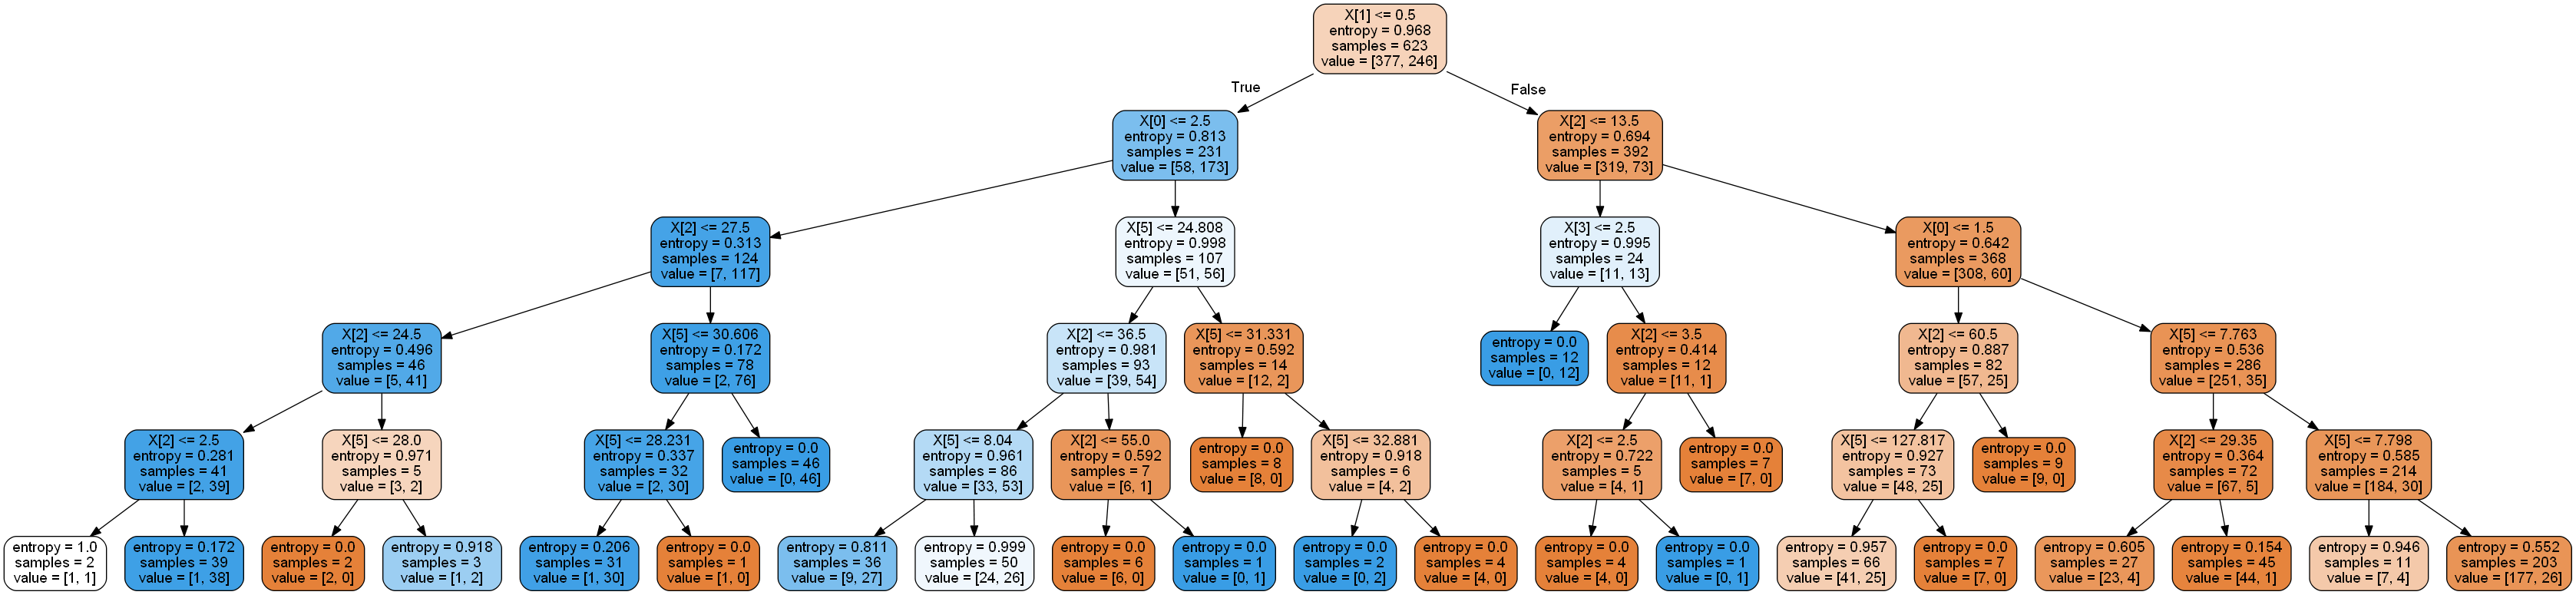

In [47]:
dot_data = StringIO()
export_graphviz(sk_tree,out_file=dot_data,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

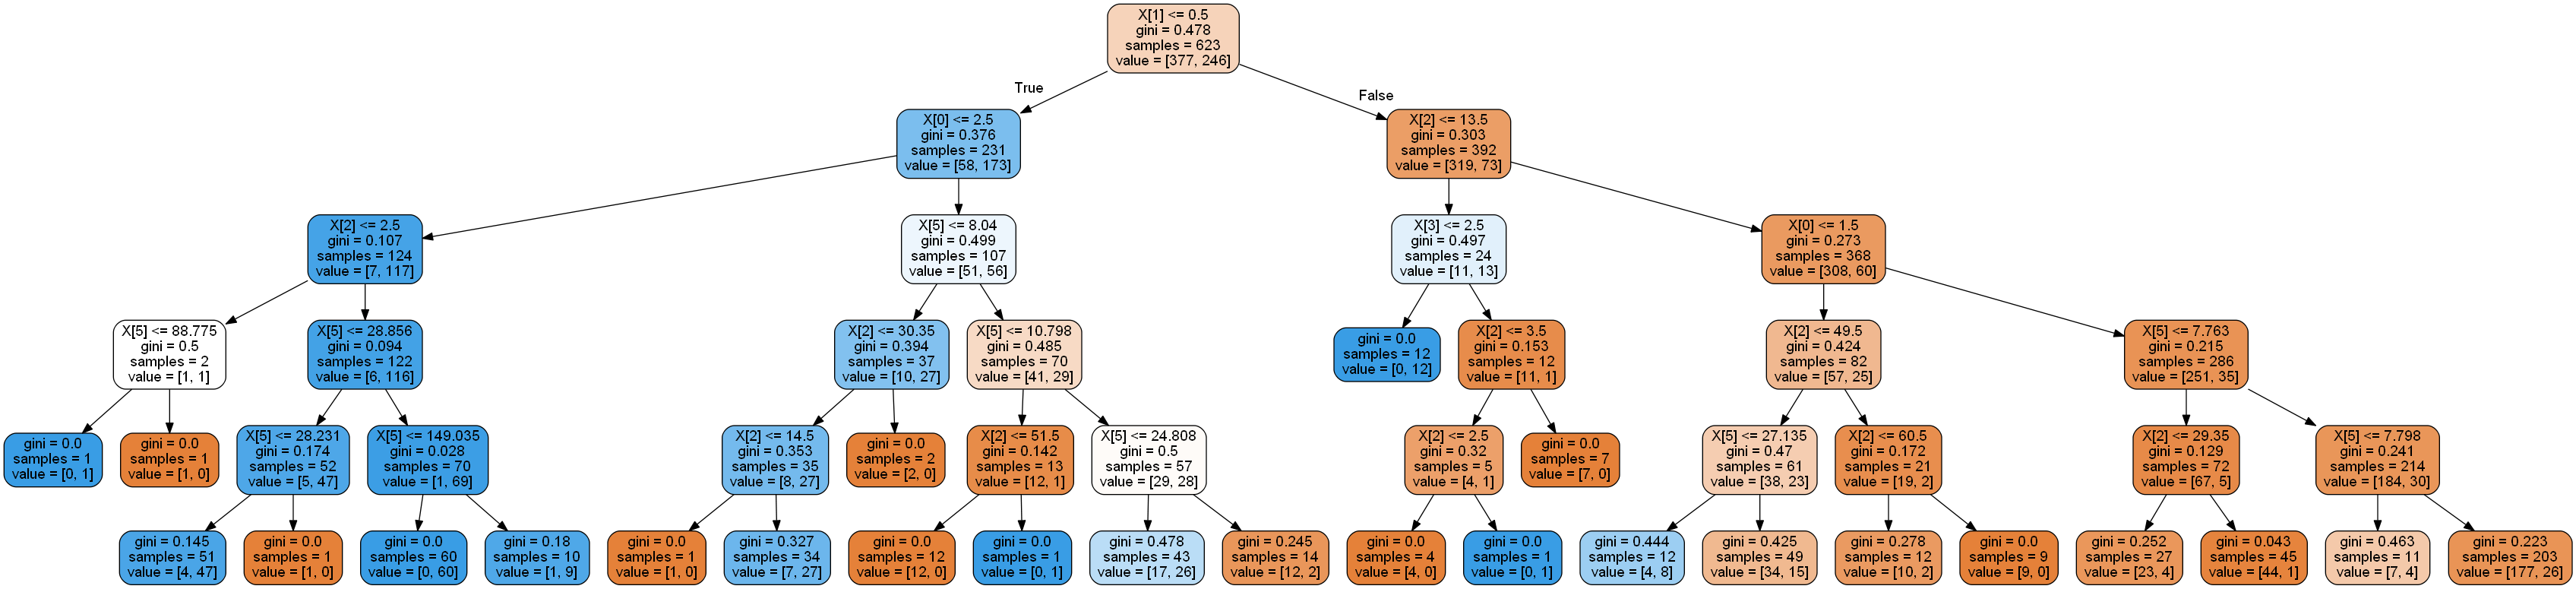

In [55]:
dot_data = StringIO()
export_graphviz(model,out_file=dot_data,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())